In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing lead dataset
data = pd.read_csv("C:/Users/HP/Downloads/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

It can be observed that there are lot of values in many columns which are marked as "Select", these values are needed to be replaced with null values.

In [4]:
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace({'Select': None})

In [5]:
data['City'] = data['City'].replace({'Select': None})

In [6]:
data['Lead Profile'] = data['Lead Profile'].replace({'Select': None})

In [7]:
data['Specialization'] = data['Specialization'].replace({'Select': None})

In [8]:
# checking non null count and datatype of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the Datatypes of the columns are in the correct format

In [9]:
# Describing data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


It can be seen that there are lot of missing values.

In [10]:
#Checking for total null values in every column
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As per the learning, it is advisable to drop the varibles which has more then 40% missing values

In [11]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

# Data Cleaning

We can observe there are variables with only 1% missing values, it is advisable to drop those values.

In [12]:
data= data.dropna(subset=['Page Views Per Visit'])

In [13]:
data= data.dropna(subset=['Last Activity'])

In [14]:
data= data.dropna(subset=['TotalVisits'])

In [15]:
# checking the null values in percentages rounding to 2 decimal points and aranging in descending columns
round(100*data.isnull().mean().sort_values(ascending=False),2)

How did you hear about X Education               78.15
Lead Profile                                     74.49
Lead Quality                                     51.95
Asymmetrique Profile Score                       45.79
Asymmetrique Activity Score                      45.79
Asymmetrique Profile Index                       45.79
Asymmetrique Activity Index                      45.79
City                                             39.55
Tags                                             36.61
Specialization                                   36.30
What matters most to you in choosing a course    29.68
What is your current occupation                  29.47
Country                                          25.53
Lead Source                                       0.32
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Through Recommendations                           0.00
I agree to

In [16]:
# List of columns have missing values > 40%
cols_to_drop=list(data.columns[100*data.isnull().mean()>40])
print(cols_to_drop, len(cols_to_drop))

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'] 7


In [17]:
# dropping 7 columns
data.drop(cols_to_drop,axis=1,inplace=True)
data.shape

(9103, 30)

In [18]:
# checking the null values in percentages rounding to 2 decimal points
round(100*data.isnull().mean().sort_values(ascending=False),2)

City                                             39.55
Tags                                             36.61
Specialization                                   36.30
What matters most to you in choosing a course    29.68
What is your current occupation                  29.47
Country                                          25.53
Lead Source                                       0.32
Through Recommendations                           0.00
Digital Advertisement                             0.00
Prospect ID                                       0.00
Receive More Updates About Our Courses            0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search                                            0.00
Newspaper 

Plotting countplots for columns with null values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

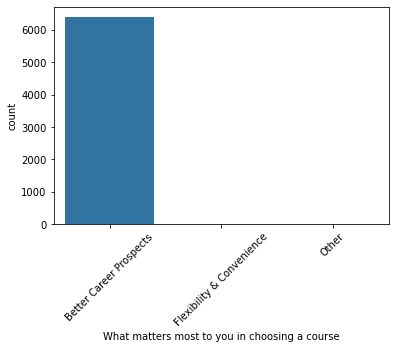

In [19]:
sns.countplot(data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [20]:
#This is highly skewed column, so it can be remove.

data=data.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

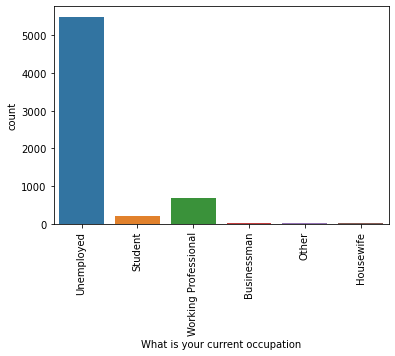

In [21]:
sns.countplot(data['What is your current occupation'])
plt.xticks(rotation=90)

Maximum or most are from the category "Unemployed" therefore, we can fill up the missing data with Unemployed. 

In [22]:
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
Last Activity                                0.0
Country                                     26.0
Specialization                              36.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

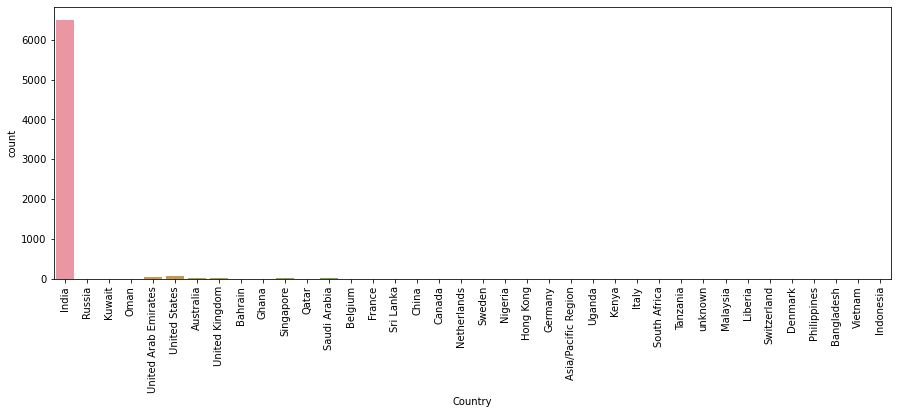

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data['Country'])
plt.xticks(rotation=90)

It is also a highly skewed column, but it is really important for the analysis. Since maximum values are from "India", therefore filling up the null values on the column with "India"

In [25]:
data['Country']=data['Country'].replace(np.nan,'India')

In [26]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
Last Activity                                0.0
Country                                      0.0
Specialization                              36.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

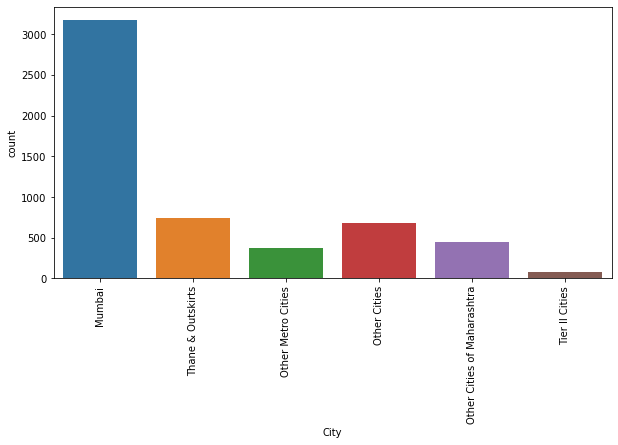

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data['City'])
plt.xticks(rotation=90)

Since most of the values are form Mumbai, we can fill the null values with "Mumbai"

In [28]:
data['City']=data['City'].replace(np.nan,'Mumbai')

In [29]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
Last Activity                                0.0
Country                                      0.0
Specialization                              36.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

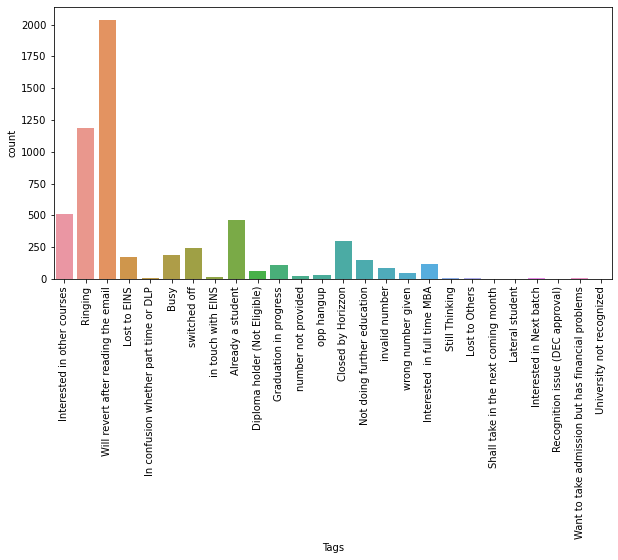

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data['Tags'])
plt.xticks(rotation=90)

Here also, as the maximum values are from "Will revert after reading the email", filling up the remaining null values with this value.

In [31]:
data['Tags']=data['Tags'].replace(np.nan,'Will revert after reading the email')

In [32]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
Last Activity                                0.0
Country                                      0.0
Specialization                              36.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

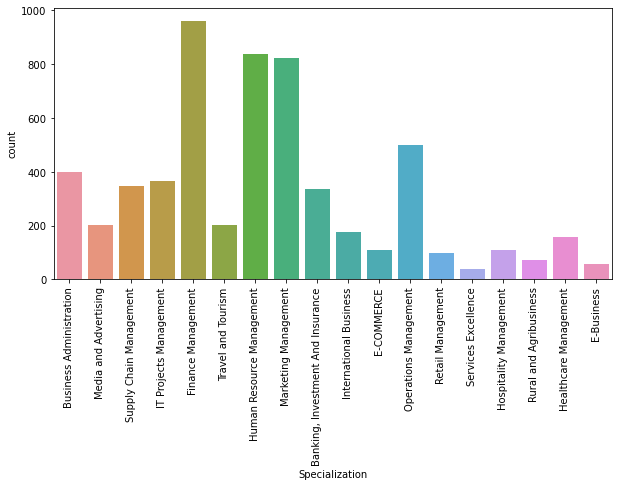

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data['Specialization'])
plt.xticks(rotation=90)

In [34]:
round(data['Specialization'].value_counts(normalize=True),2)*100

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
E-COMMERCE                            2.0
Hospitality Management                2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

This column signifies the occupation or position of the customer, the 36% null values cannot be filled with assuming values, therefore filling those empty cells with "Others" 

In [35]:
data["Specialization"] = data["Specialization"].replace(np.nan, "Others")

In [36]:
# Finding the null percentages across columns
round(data.isnull().sum()/len(data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

There are no null values left in the dataset. 

# Exploratory Data Anaysis

In [37]:
#Checking the percentage of converted customers

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

#38% of leads are converted into leads.

38.02043282434362

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

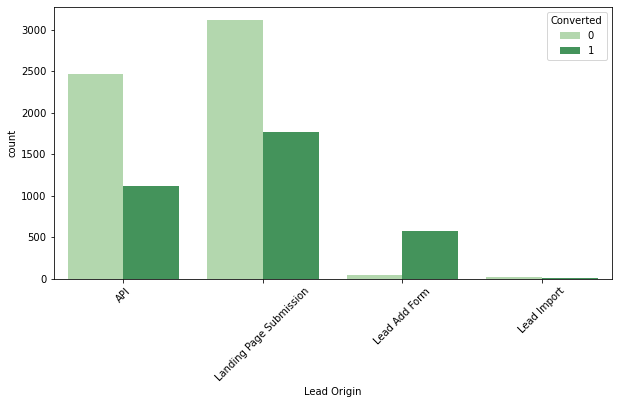

In [38]:
#plotting a count plot of Lead origin w.r.t the target variable converted

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data,palette='Greens')
plt.xticks(rotation = 45)

In [39]:
percentage_values = (data["Lead Origin"].value_counts() / len(data["Lead Origin"])) * 100
percentage_values

Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64

Conclusion: 

- Although landing pages submission has nearly 1000 conversion rate,and API has 1700, they nonetheless generate a sizable number of leads.
- Although the Lead Add Form has a conversion rate of above 500, the number of leads is not very large in comparision.
- There are extremely little lead imports.


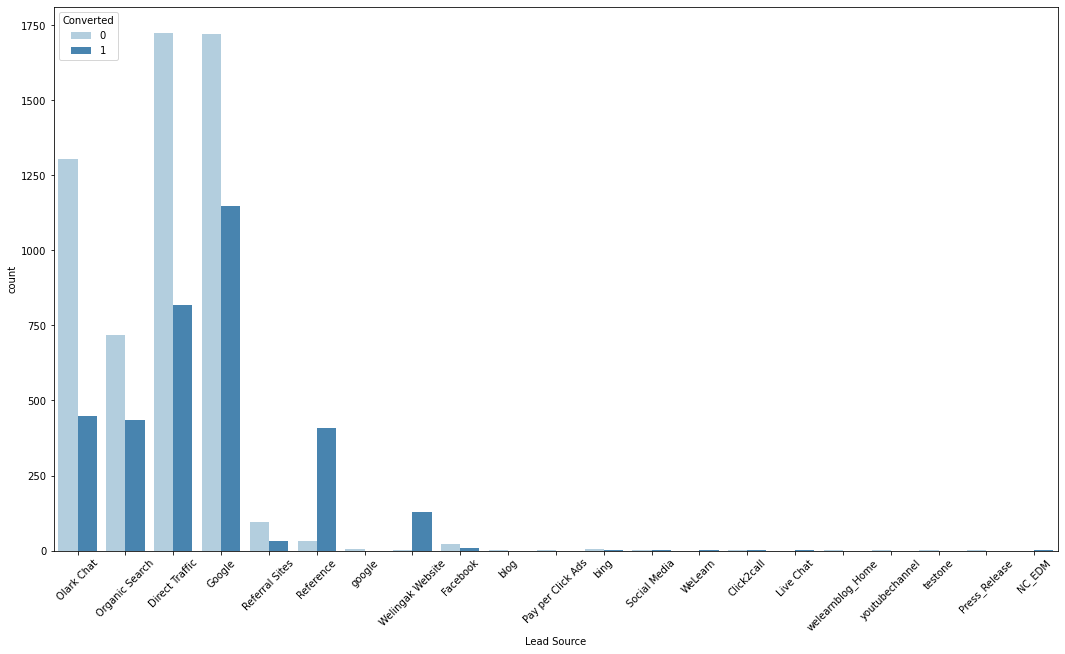

In [40]:
#plotting for lead source
plt.figure(figsize=(18,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='Blues')
plt.xticks(rotation = 45)
plt.show()

as we can observe there are 2 googles that are "Google" and "google" with a small 'g'. Now we can replace google with Google as Google is providing more conversion rate


In [41]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')

Since here a lot of columns are not giving a visible conversion rate, hence we will be naming all those values as "others".

In [42]:
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

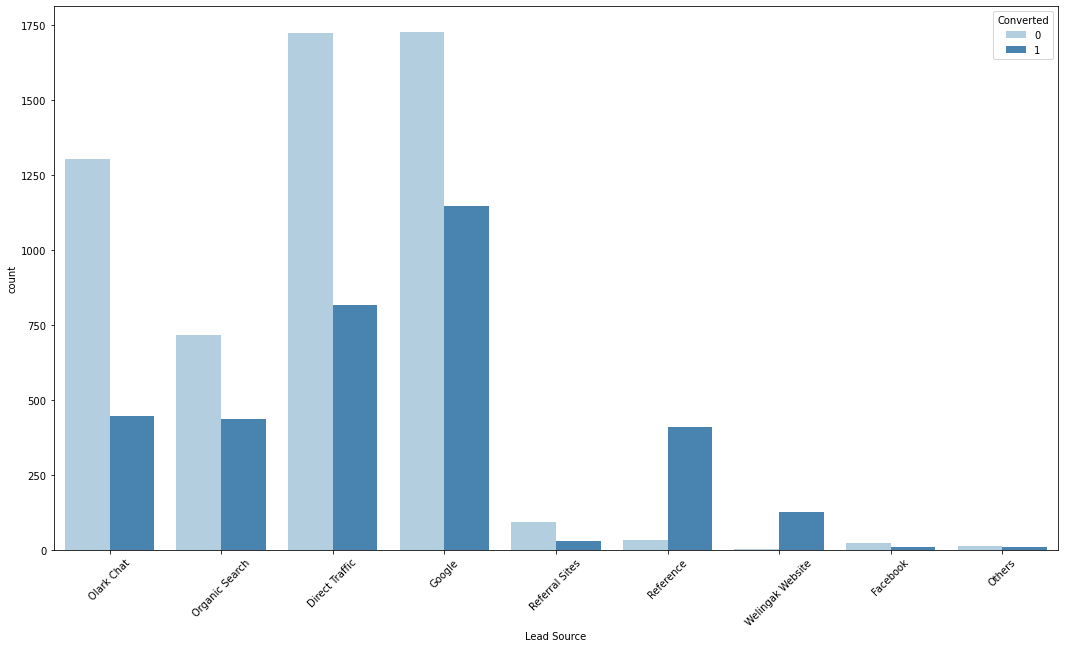

In [43]:
#plotting for lead source again after renaming
plt.figure(figsize=(18,10))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='Blues')
plt.xticks(rotation = 45)
plt.show()

Conclusion
- The greatest amount of leads are generated by Google and Direct traffic.
- Reference leads and leads obtained from the Welingak website have a good conversion rate.
- Focus should be placed on increasing lead conversion from Google leads, olark chat, organic search, direct traffic, and Google leads. More leads should be generated via the Welingak website and references.



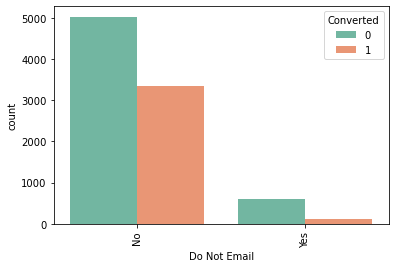

In [44]:
#plotting a count plot of Do Not Email w.r.t the target variable converted

sns.countplot(x = "Do Not Email", hue = "Converted", data = data,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

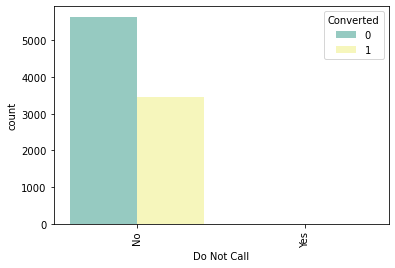

In [45]:
#plotting a count plot of Do Not Call w.r.t the target variable converted

sns.countplot(x = "Do Not Call", hue = "Converted", data = data,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

Difficult to analyse anything from the above plotting. 

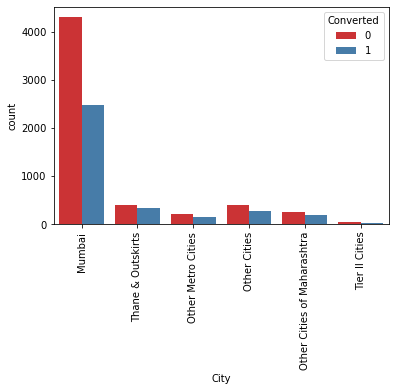

In [46]:
#plotting a count plot of City w.r.t the target variable converted

sns.countplot(x = "City", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

- Most of the conversions are 0 i.e. No.
- Mumbai is the only city with highest conversion rate among all

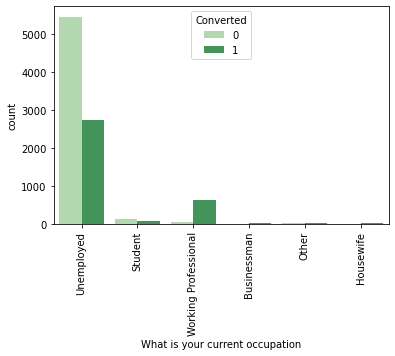

In [47]:
#plotting a count plot of What is your current occupation w.r.t the target variable converted


sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette='Greens')
plt.xticks(rotation = 90)
plt.show()

- Maximum visitors are unemployed but the conversion rate is nearly half.
- The highest number of conversions are from the working professionals.

<AxesSubplot:xlabel='TotalVisits'>

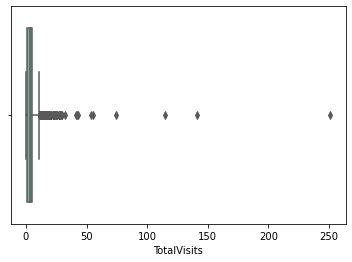

In [48]:
#now plotting a box plot for TotalVisits

sns.boxplot(data['TotalVisits'],orient='vert',palette='Set2')

The data has several outliers, as can be seen. For analytical purposes, we shall cap the outliers at 95% value.

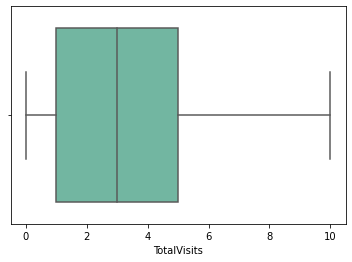

In [49]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

sns.boxplot(data['TotalVisits'],orient='vert',palette='Set2')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

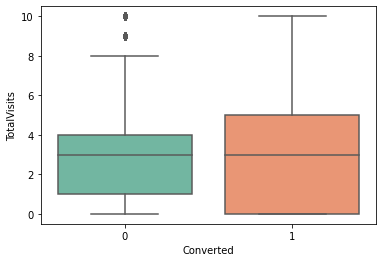

In [50]:
#Now, analysing with Bivariate Analysis w.r.t. target variable "Converted"

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data,palette='Set2')

- The median for leads that have been converted and those that have not are same.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

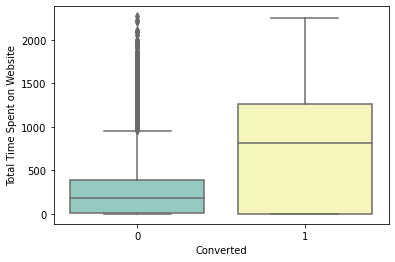

In [51]:
#plotting a box plot of Total Time Spend on Website w.r.t the target variable converted

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data,palette='Set3')

Conclusion
- Longer sessions on the website increase the likelihood of conversion for leads.

<AxesSubplot:xlabel='Page Views Per Visit'>

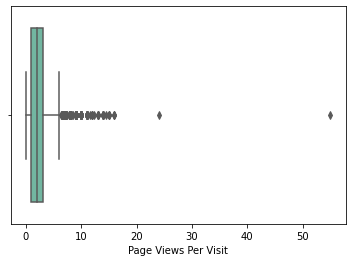

In [52]:
sns.boxplot(data['Page Views Per Visit'],orient='vert',palette='Set2')

The data has several outliers, as can be seen. For analytical purposes, we shall cap the outliers at 95% value.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

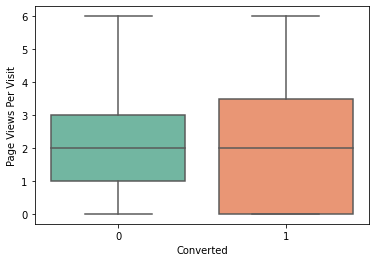

In [53]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data,palette='Set2')

The median for leads that have been converted and those that have not are same.

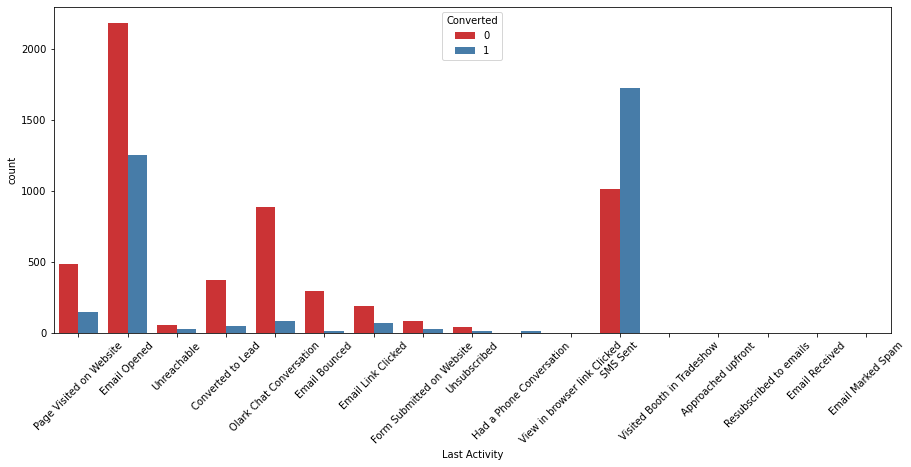

In [54]:
#plotting a count plot of Last Activity w.r.t the target variable converted

plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

plt.show()

Similarly, here also there are lot of columns are not giving a visible conversion rate, hence we will be naming all those values as "others".

In [55]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

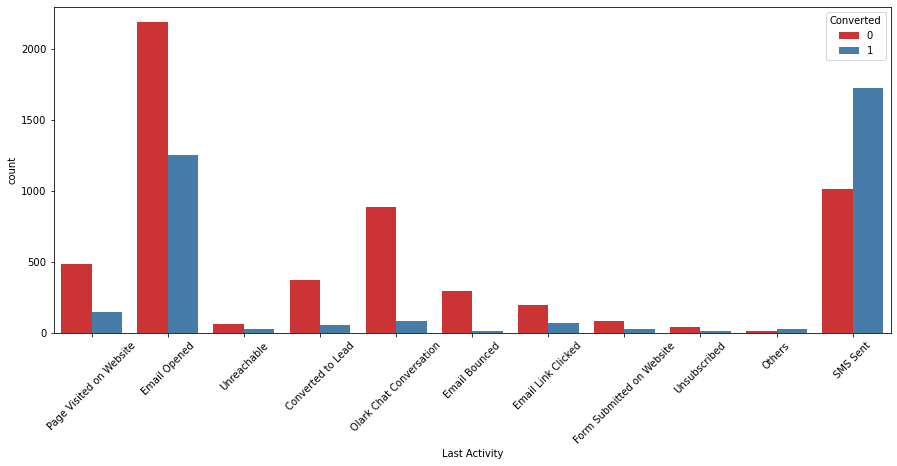

In [56]:
#Plotting again

plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

plt.show()

Conclusion
- The majority of leads have opened their emails as their most recent action, but showed maximum as not converted. 
- Leads with the most recent activity being an SMS sent have a nearly 1700 conversion rate.


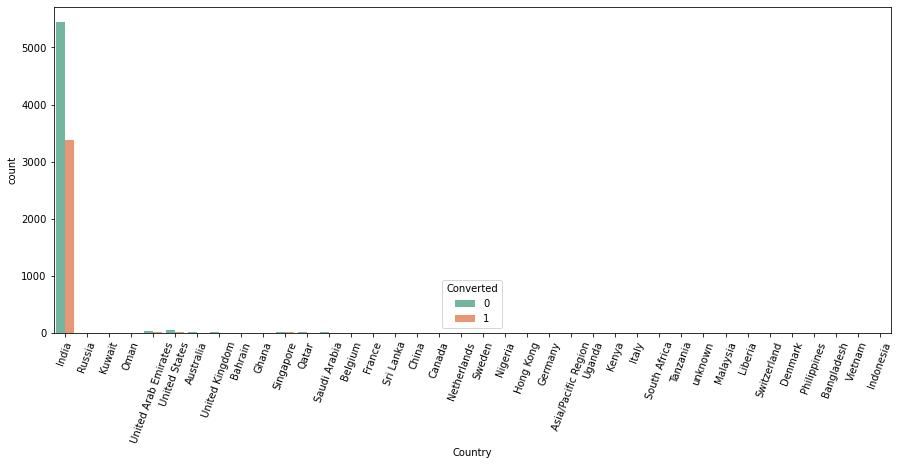

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = data,palette='Set2')
plt.xticks(rotation = 70)

plt.show()

As can be observed, maximum are from India, nothing can be analysed from the above plotting.

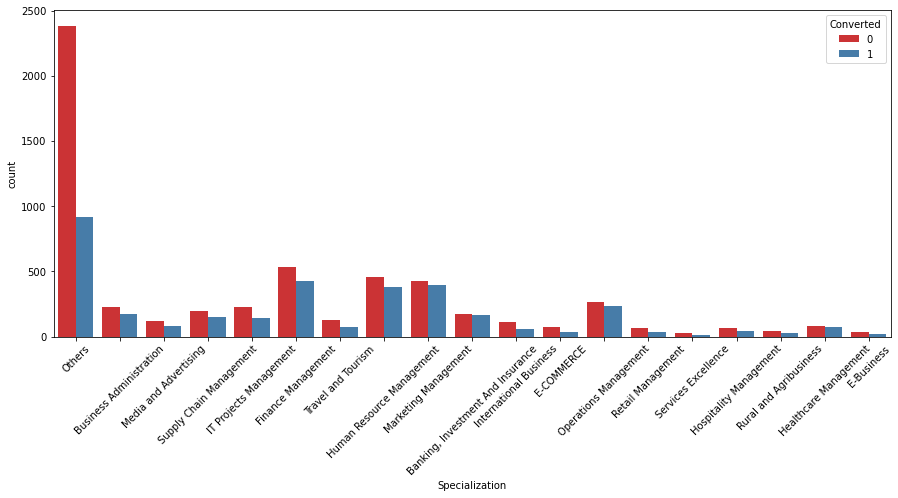

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

plt.show()

- The specialization with the highest conversion rate needs to receive greater attention like Human Resource Management, E-Commerce, Travel and Tourism

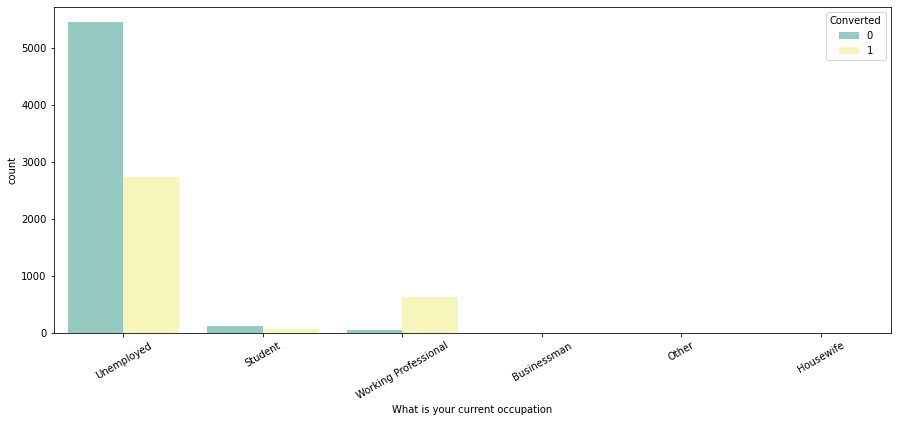

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data,palette='Set3')
plt.xticks(rotation = 30)

plt.show()

- It can be observed that Working Porfessionals have high chances of converting.
- Also the quantity and rejection of unemployment is max

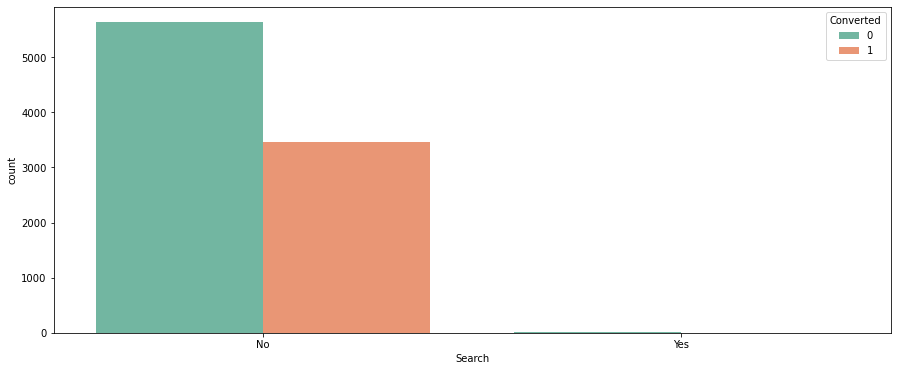

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Search", hue = "Converted", data = data,palette='Set2')

plt.show()

This column does not give any understanding

<AxesSubplot:xlabel='Magazine', ylabel='count'>

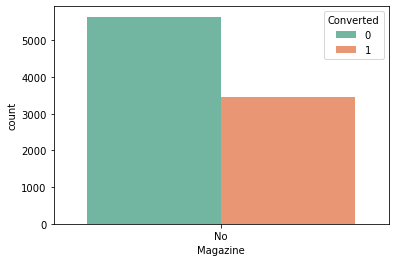

In [61]:
sns.countplot(x = "Magazine", hue = "Converted", data = data,palette='Set2')

Same as "Search", this column does not give any understanding

<AxesSubplot:xlabel='Newspaper Article', ylabel='count'>

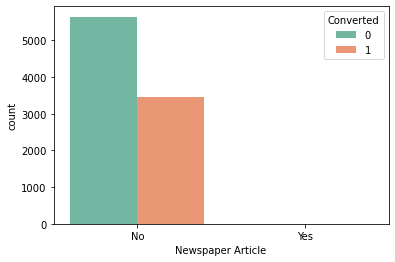

In [62]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

<AxesSubplot:xlabel='X Education Forums', ylabel='count'>

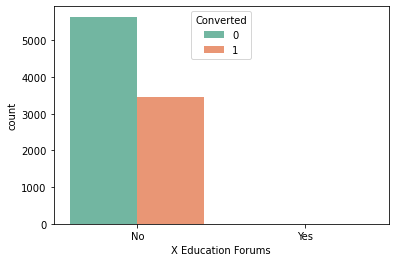

In [63]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

<AxesSubplot:xlabel='Newspaper', ylabel='count'>

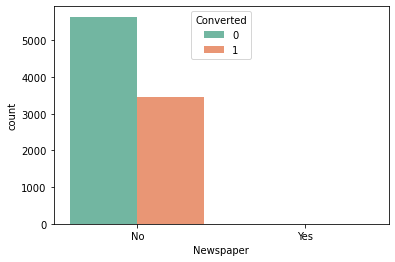

In [64]:
sns.countplot(x = "Newspaper", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

<AxesSubplot:xlabel='Digital Advertisement', ylabel='count'>

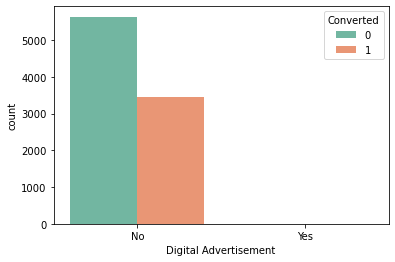

In [65]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

<AxesSubplot:xlabel='Through Recommendations', ylabel='count'>

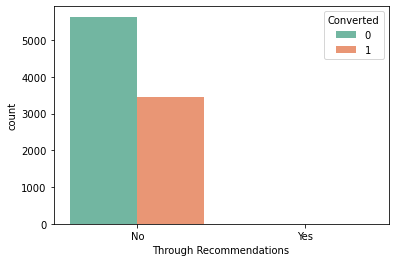

In [66]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

<AxesSubplot:xlabel='Receive More Updates About Our Courses', ylabel='count'>

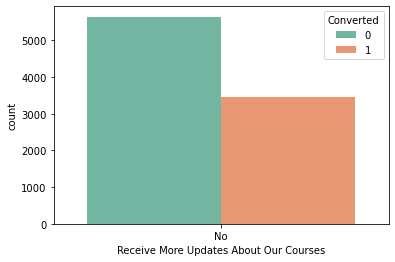

In [67]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = data,palette='Set2')

This column does not give any understanding

As from the above plotting, it can be analysed that there is no understanding or analysis from advertisement as maximum were "no"

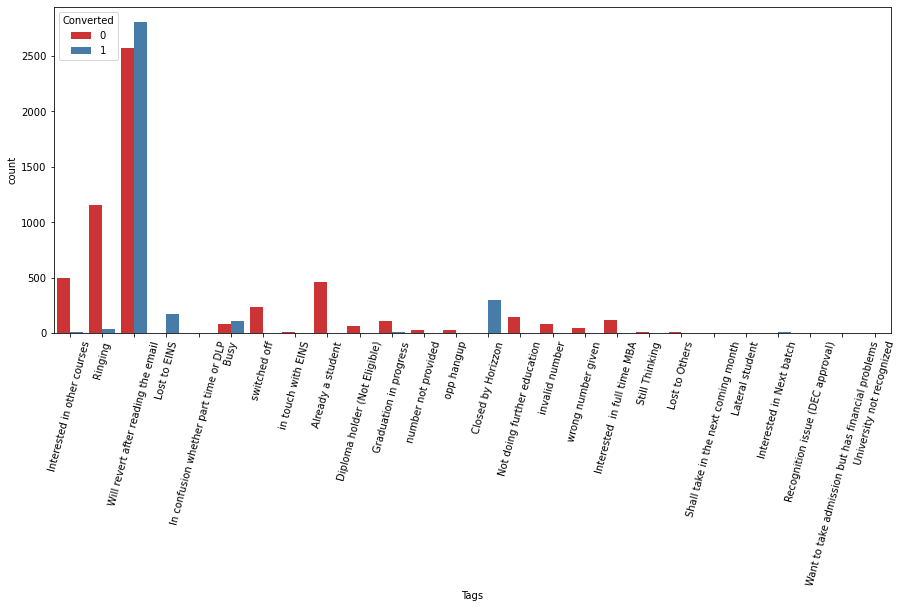

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 75)

plt.show()

This column cannot be used for model development because it is generated by the sales team for their analysis. Consequently, before creating the model, we must eliminate this column.


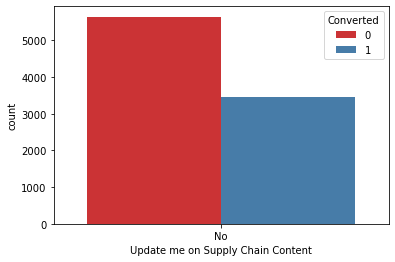

In [69]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = data,palette='Set1')

plt.show()

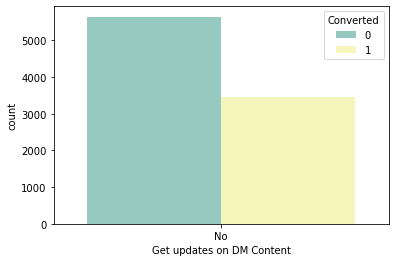

In [70]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = data,palette='Set3')

plt.show()

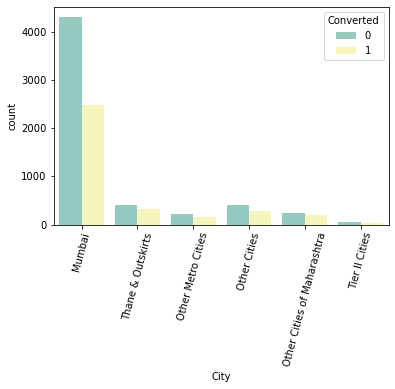

In [71]:
sns.countplot(x = "City", hue = "Converted", data = data,palette='Set3')
plt.xticks(rotation = 75)

plt.show()

- Mumbai provides the majority of leads, with a 50% conversion rate.
- whereas Thane and Outskirts gives the highest percentage of converted leads 

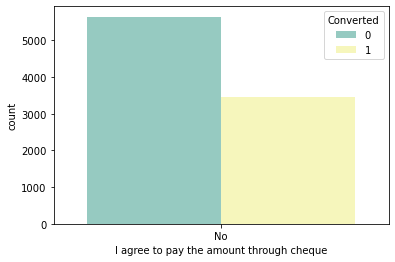

In [72]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = data,palette='Set3')

plt.show()

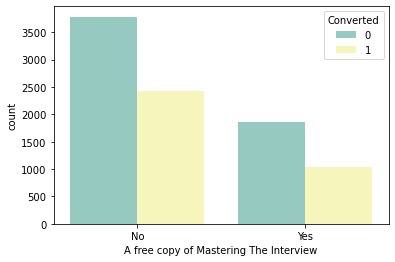

In [73]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = data,palette='Set3')

plt.show()

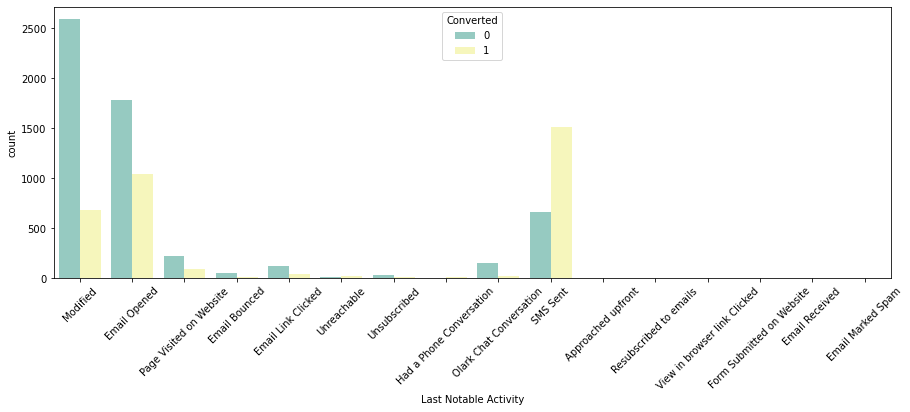

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data,palette='Set3')
plt.xticks(rotation = 45)

plt.show()

After doing EDA on all the columns of the database, it was found that there are many columns which are not giving any information for our analysis. Keeping those columns for the analysis will complicate the outcome of the process. Therefore it is best to drop those columns to avoid any misunderstanding. 

In [75]:
data.shape

(9103, 29)

In [76]:
data = data.drop(['Lead Number','Country','Tags','Search','Magazine','Newspaper Article','Get updates on DM Content','X Education Forums',
                            'Newspaper','Through Recommendations','Digital Advertisement','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [77]:
data.shape

(9103, 14)

In [78]:
data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

# Preparing the Data

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9103 non-null   object 
 1   Lead Origin                      9103 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9103 non-null   object 
 4   Do Not Call                      9103 non-null   object 
 5   Converted                        9103 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9103 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9103 non-null   object 
 10  Specialization                   9103 non-null   object 
 11  What is your current occupation  9103 non-null   object 
 12  City                

In [80]:
#Firstly, converting all the columns with binary variables. Yes to 1 and NO to 0

data['Do Not Email'] = data['Do Not Email'].replace({'Yes': 1, 'No': 0})

In [81]:
data['Do Not Call'] = data['Do Not Call'].replace({'Yes': 1, 'No': 0})

In [82]:
#Creating dummines of categorical columns and dropping the original one
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
#now connecting or Concatenating the dummy data to the original data

data = pd.concat([data, dummy], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [84]:
#printing all the columns

data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribe

In [85]:
#since we got our dataset with dummy variable, now there is no need of variable because of which dummies are created
#there were mainly 7 column which made dummy variables, dropping those columns

data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
#updated columns

data.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',

The shape of our dataset is now 5×71

Further, lets split the dataset into training and testing



# Splitting the data into training and testing

In [87]:
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [88]:
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
#scaling the train dataset

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,-0.068258,1.476324,-0.423364,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,1.362470,-0.771066,2.083179,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.647106,-0.571257,0.133646,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,2.435517,1.393834,0.690655,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-1.141305,-0.881052,-1.258878,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Verifying the rate of lead conversion

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.02043282434362

# Building The Model

In [92]:
# executing an RFE for 20 variables
logreg = LogisticRegression()

rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 45),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 19),
 ('Last Activity_SMS Sent', True, 1),
 ('Last 

In [95]:
#columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [96]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.9
Date:                Sun, 25 Feb 2024   Deviance:                       5231.8
Time:                        03:10:39   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6056      0.262     -2.312      0.021      -1.119      -0.092
Do Not Email                                            -1.3176      0.182     -7.221      0.000      -1.675      -0.960
Total Time Spent on Website                              1.0900      0.040     27.131      0.000       1.011       1.169
Lead Origin_Landing Page Submission                     -0.9617      0.127     -7.588      0.000      -1.210      -0.713
Lead Origin_Lead Add Form                                3.4464      0.237     14.551      0.000       2.982       3.911
Lead Origin_Lead Import                                  0.8340      0.462      1.804      0.071      -0.072       1.740
Lead Source_Olark Chat                                   0.9993      0.123      8.131      0.000       0.758       1.240
Lead Source_Welingak Website                             2.4401      0.760      3.212      0.001       0.951       3.929
Last Activity_Email Opened                               0.7531      0.106      7.098      0.000       0.545       0.961
Last Activity_Olark Chat Conversation                   -0.7862      0.185     -4.251      0.000      -1.149      -0.424
Last Activity_Others                                     1.7835      0.493      3.614      0.000       0.816       2.751
Last Activity_SMS Sent                                   0.8763      0.162      5.400      0.000       0.558       1.194
Last Activity_Unsubscribed                               1.5650      0.469      3.336      0.001       0.646       2.484
Specialization_E-Business                                0.7879      0.437      1.801      0.072      -0.069       1.645
Specialization_Others                                   -0.9833      0.121     -8.113      0.000      -1.221      -0.746
What is your current occupation_Housewife               22.7605   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Unemployed              -0.5199      0.223     -2.329      0.020      -0.957      -0.082
What is your current occupation_Working Professional     2.1485      0.289      7.432      0.000       1.582       2.715
Last Notable Activity_Had a Phone Conversation           1.7661      1.244      1.419      0.156      -0.673       4.205
Last Notable Activity_SMS Sent                           1.3227      0.150      8.806      0.000       1.028       1.617
Last Notable Activity_Unreachable                        2.3472      0.517      4.542      0.000       1.334       3.360
========================================================================================================================
"""

In [97]:
# Dropping the column 'What is your current occupation_Housewife' since its P value is high
col1 = cols.drop('What is your current occupation_Housewife')

In [98]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.0
Date:                Sun, 25 Feb 2024   Deviance:                       5241.9
Time:                        03:10:40   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4627      0.255     -1.818      0.069      -0.962       0.036
Do Not Email                                            -1.3226      0.182     -7.254      0.000      -1.680      -0.965
Total Time Spent on Website                              1.0893      0.040     27.145      0.000       1.011       1.168
Lead Origin_Landing Page Submission                     -0.9584      0.127     -7.572      0.000      -1.206      -0.710
Lead Origin_Lead Add Form                                3.4496      0.237     14.568      0.000       2.985       3.914
Lead Origin_Lead Import                                  0.8343      0.462      1.805      0.071      -0.072       1.740
Lead Source_Olark Chat                                   0.9966      0.123      8.112      0.000       0.756       1.237
Lead Source_Welingak Website                             2.4397      0.760      3.211      0.001       0.951       3.929
Last Activity_Email Opened                               0.7512      0.106      7.098      0.000       0.544       0.959
Last Activity_Olark Chat Conversation                   -0.7936      0.185     -4.292      0.000      -1.156      -0.431
Last Activity_Others                                     1.7814      0.494      3.610      0.000       0.814       2.749
Last Activity_SMS Sent                                   0.8722      0.162      5.379      0.000       0.554       1.190
Last Activity_Unsubscribed                               1.5668      0.469      3.340      0.001       0.648       2.486
Specialization_E-Business                                0.7795      0.438      1.780      0.075      -0.079       1.638
Specialization_Others                                   -0.9851      0.121     -8.137      0.000      -1.222      -0.748
What is your current occupation_Unemployed              -0.6604      0.215     -3.073      0.002      -1.082      -0.239
What is your current occupation_Working Professional     2.0064      0.283      7.102      0.000       1.453       2.560
Last Notable Activity_Had a Phone Conversation           1.7630      1.244      1.417      0.156      -0.675       4.201
Last Notable Activity_SMS Sent                           1.3221      0.150      8.801      0.000       1.028       1.616
Last Notable Activity_Unreachable                        2.3433      0.517      4.535      0.000       1.331       3.356
========================================================================================================================
"""

In [99]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation' since its P value is high

col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [100]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.2
Date:                Sun, 25 Feb 2024   Deviance:                       5244.4
Time:                        03:10:40   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4622      0.254     -1.816      0.069      -0.961       0.037
Do Not Email                                            -1.3257      0.182     -7.268      0.000      -1.683      -0.968
Total Time Spent on Website                              1.0889      0.040     27.143      0.000       1.010       1.168
Lead Origin_Landing Page Submission                     -0.9573      0.126     -7.569      0.000      -1.205      -0.709
Lead Origin_Lead Add Form                                3.4498      0.237     14.568      0.000       2.986       3.914
Lead Origin_Lead Import                                  0.8345      0.462      1.805      0.071      -0.071       1.740
Lead Source_Olark Chat                                   0.9957      0.123      8.104      0.000       0.755       1.237
Lead Source_Welingak Website                             2.4420      0.760      3.214      0.001       0.953       3.931
Last Activity_Email Opened                               0.7511      0.106      7.098      0.000       0.544       0.958
Last Activity_Olark Chat Conversation                   -0.7918      0.185     -4.282      0.000      -1.154      -0.429
Last Activity_Others                                     2.1336      0.440      4.846      0.000       1.271       2.997
Last Activity_SMS Sent                                   0.8720      0.162      5.379      0.000       0.554       1.190
Last Activity_Unsubscribed                               1.5691      0.469      3.345      0.001       0.650       2.488
Specialization_E-Business                                0.7925      0.435      1.823      0.068      -0.059       1.644
Specialization_Others                                   -0.9881      0.121     -8.164      0.000      -1.225      -0.751
What is your current occupation_Unemployed              -0.6601      0.215     -3.071      0.002      -1.081      -0.239
What is your current occupation_Working Professional     2.0018      0.283      7.086      0.000       1.448       2.556
Last Notable Activity_SMS Sent                           1.3221      0.150      8.802      0.000       1.028       1.616
Last Notable Activity_Unreachable                        2.3425      0.517      4.534      0.000       1.330       3.355
========================================================================================================================
"""

In [101]:
# Dropping the column 'Lead Origin_Lead Import' since its P value is high

col1 = col1.drop('Lead Origin_Lead Import')

In [102]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.7
Date:                Sun, 25 Feb 2024   Deviance:                       5247.3
Time:                        03:10:40   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4323      0.254     -1.702      0.089      -0.930       0.065
Do Not Email                                            -1.3245      0.182     -7.265      0.000      -1.682      -0.967
Total Time Spent on Website                              1.0817      0.040     27.150      0.000       1.004       1.160
Lead Origin_Landing Page Submission                     -0.9921      0.125     -7.925      0.000      -1.237      -0.747
Lead Origin_Lead Add Form                                3.4155      0.236     14.475      0.000       2.953       3.878
Lead Source_Olark Chat                                   0.9692      0.122      7.960      0.000       0.731       1.208
Lead Source_Welingak Website                             2.4504      0.760      3.225      0.001       0.961       3.940
Last Activity_Email Opened                               0.7579      0.106      7.173      0.000       0.551       0.965
Last Activity_Olark Chat Conversation                   -0.7917      0.185     -4.283      0.000      -1.154      -0.429
Last Activity_Others                                     2.1310      0.440      4.845      0.000       1.269       2.993
Last Activity_SMS Sent                                   0.8831      0.162      5.452      0.000       0.566       1.201
Last Activity_Unsubscribed                               1.5680      0.468      3.347      0.001       0.650       2.486
Specialization_E-Business                                0.7888      0.434      1.818      0.069      -0.062       1.639
Specialization_Others                                   -1.0086      0.121     -8.347      0.000      -1.245      -0.772
What is your current occupation_Unemployed              -0.6555      0.215     -3.050      0.002      -1.077      -0.234
What is your current occupation_Working Professional     2.0065      0.282      7.103      0.000       1.453       2.560
Last Notable Activity_SMS Sent                           1.3114      0.150      8.741      0.000       1.017       1.605
Last Notable Activity_Unreachable                        2.3381      0.516      4.527      0.000       1.326       3.350
========================================================================================================================
"""

In [103]:
# Dropping the column 'pecialization_E-Business' since its P value is high

col1 = col1.drop('Specialization_E-Business')

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.3
Date:                Sun, 25 Feb 2024   Deviance:                       5250.5
Time:                        03:10:40   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4209      0.254     -1.660      0.097      -0.918       0.076
Do Not Email                                            -1.3246      0.182     -7.266      0.000      -1.682      -0.967
Total Time Spent on Website                              1.0809      0.040     27.149      0.000       1.003       1.159
Lead Origin_Landing Page Submission                     -0.9886      0.125     -7.901      0.000      -1.234      -0.743
Lead Origin_Lead Add Form                                3.4183      0.236     14.492      0.000       2.956       3.881
Lead Source_Olark Chat                                   0.9670      0.122      7.945      0.000       0.728       1.205
Lead Source_Welingak Website                             2.4469      0.760      3.221      0.001       0.958       3.936
Last Activity_Email Opened                               0.7534      0.106      7.136      0.000       0.546       0.960
Last Activity_Olark Chat Conversation                   -0.7919      0.185     -4.289      0.000      -1.154      -0.430
Last Activity_Others                                     2.1409      0.438      4.891      0.000       1.283       2.999
Last Activity_SMS Sent                                   0.8756      0.162      5.408      0.000       0.558       1.193
Last Activity_Unsubscribed                               1.5828      0.469      3.374      0.001       0.663       2.502
Specialization_Others                                   -1.0130      0.121     -8.389      0.000      -1.250      -0.776
What is your current occupation_Unemployed              -0.6579      0.215     -3.067      0.002      -1.078      -0.237
What is your current occupation_Working Professional     1.9967      0.282      7.078      0.000       1.444       2.550
Last Notable Activity_SMS Sent                           1.3124      0.150      8.747      0.000       1.018       1.606
Last Notable Activity_Unreachable                        2.3279      0.516      4.508      0.000       1.316       3.340
========================================================================================================================
"""

In [105]:
# Dropping the column 'What is your current occupation_Unemployed' since its P value is high

col1 = col1.drop('What is your current occupation_Unemployed')

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.8
Date:                Sun, 25 Feb 2024   Deviance:                       5259.6
Time:                        03:10:41   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0594      0.145     -7.318      0.000      -1.343      -0.776
Do Not Email                                            -1.3181      0.182     -7.227      0.000      -1.676      -0.961
Total Time Spent on Website                              1.0804      0.040     27.149      0.000       1.002       1.158
Lead Origin_Landing Page Submission                     -0.9889      0.125     -7.896      0.000      -1.234      -0.743
Lead Origin_Lead Add Form                                3.4273      0.236     14.547      0.000       2.966       3.889
Lead Source_Olark Chat                                   0.9723      0.122      7.993      0.000       0.734       1.211
Lead Source_Welingak Website                             2.4283      0.760      3.197      0.001       0.940       3.917
Last Activity_Email Opened                               0.7596      0.106      7.197      0.000       0.553       0.966
Last Activity_Olark Chat Conversation                   -0.7772      0.184     -4.216      0.000      -1.138      -0.416
Last Activity_Others                                     2.1243      0.438      4.854      0.000       1.267       2.982
Last Activity_SMS Sent                                   0.8616      0.162      5.327      0.000       0.545       1.179
Last Activity_Unsubscribed                               1.5596      0.469      3.325      0.001       0.640       2.479
Specialization_Others                                   -1.0209      0.121     -8.435      0.000      -1.258      -0.784
What is your current occupation_Working Professional     2.6344      0.191     13.775      0.000       2.260       3.009
Last Notable Activity_SMS Sent                           1.3164      0.150      8.780      0.000       1.022       1.610
Last Notable Activity_Unreachable                        2.3100      0.516      4.474      0.000       1.298       3.322
========================================================================================================================
"""

In [107]:
#checking VIF of the remaining columns

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.15
13,Last Notable Activity_SMS Sent,5.07
2,Lead Origin_Landing Page Submission,2.72
11,Specialization_Others,2.52
6,Last Activity_Email Opened,2.43
4,Lead Source_Olark Chat,2.16
7,Last Activity_Olark Chat Conversation,1.74
3,Lead Origin_Lead Add Form,1.68
5,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.29


In [108]:
# Dropping the column 'Last Activity_SMS Sent' since its VIF is high

col1 = col1.drop('Last Activity_SMS Sent')

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.7
Date:                Sun, 25 Feb 2024   Deviance:                       5287.3
Time:                        03:10:41   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8202      0.135     -6.067      0.000      -1.085      -0.555
Do Not Email                                            -1.3751      0.180     -7.625      0.000      -1.729      -1.022
Total Time Spent on Website                              1.0786      0.040     27.218      0.000       1.001       1.156
Lead Origin_Landing Page Submission                     -0.9823      0.125     -7.880      0.000      -1.227      -0.738
Lead Origin_Lead Add Form                                3.4900      0.236     14.757      0.000       3.027       3.954
Lead Source_Olark Chat                                   0.9703      0.121      8.002      0.000       0.733       1.208
Lead Source_Welingak Website                             2.5193      0.761      3.312      0.001       1.028       4.010
Last Activity_Email Opened                               0.5145      0.092      5.595      0.000       0.334       0.695
Last Activity_Olark Chat Conversation                   -1.0192      0.177     -5.756      0.000      -1.366      -0.672
Last Activity_Others                                     1.8836      0.435      4.335      0.000       1.032       2.735
Last Activity_Unsubscribed                               1.3662      0.466      2.929      0.003       0.452       2.280
Specialization_Others                                   -1.0157      0.121     -8.428      0.000      -1.252      -0.780
What is your current occupation_Working Professional     2.6143      0.190     13.742      0.000       2.241       2.987
Last Notable Activity_SMS Sent                           1.9360      0.100     19.434      0.000       1.741       2.131
Last Notable Activity_Unreachable                        2.0655      0.514      4.022      0.000       1.059       3.072
========================================================================================================================
"""

In [110]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.36
2,Lead Origin_Landing Page Submission,2.33
6,Last Activity_Email Opened,2.19
4,Lead Source_Olark Chat,2.14
12,Last Notable Activity_SMS Sent,1.82
7,Last Activity_Olark Chat Conversation,1.67
3,Lead Origin_Lead Add Form,1.63
5,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.29
0,Do Not Email,1.27


In [111]:
# Dropping the column 'Last Activity_Unsubscribed' since its P value is high

col1 = col1.drop('Last Activity_Unsubscribed')

In [112]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.4
Date:                Sun, 25 Feb 2024   Deviance:                       5294.7
Time:                        03:10:41   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8056      0.135     -5.968      0.000      -1.070      -0.541
Do Not Email                                            -1.2426      0.170     -7.291      0.000      -1.577      -0.909
Total Time Spent on Website                              1.0785      0.040     27.236      0.000       1.001       1.156
Lead Origin_Landing Page Submission                     -0.9836      0.125     -7.891      0.000      -1.228      -0.739
Lead Origin_Lead Add Form                                3.4910      0.237     14.726      0.000       3.026       3.956
Lead Source_Olark Chat                                   0.9695      0.121      7.996      0.000       0.732       1.207
Lead Source_Welingak Website                             2.4761      0.759      3.261      0.001       0.988       3.964
Last Activity_Email Opened                               0.5002      0.092      5.460      0.000       0.321       0.680
Last Activity_Olark Chat Conversation                   -1.0355      0.177     -5.857      0.000      -1.382      -0.689
Last Activity_Others                                     1.8630      0.434      4.290      0.000       1.012       2.714
Specialization_Others                                   -1.0139      0.120     -8.415      0.000      -1.250      -0.778
What is your current occupation_Working Professional     2.6109      0.190     13.771      0.000       2.239       2.983
Last Notable Activity_SMS Sent                           1.9130      0.099     19.338      0.000       1.719       2.107
Last Notable Activity_Unreachable                        2.0515      0.513      3.995      0.000       1.045       3.058
========================================================================================================================
"""

In [113]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.36
2,Lead Origin_Landing Page Submission,2.33
6,Last Activity_Email Opened,2.18
4,Lead Source_Olark Chat,2.14
11,Last Notable Activity_SMS Sent,1.82
7,Last Activity_Olark Chat Conversation,1.67
3,Lead Origin_Lead Add Form,1.63
5,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.29
0,Do Not Email,1.19


In [114]:
# Dropping the column 'Lead Source_Welingak Website' since its P value is high

col1 = col1.drop('Lead Source_Welingak Website')

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.6
Date:                Sun, 25 Feb 2024   Deviance:                       5313.3
Time:                        03:10:42   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8446      0.135     -6.254      0.000      -1.109      -0.580
Do Not Email                                            -1.2154      0.168     -7.241      0.000      -1.544      -0.886
Total Time Spent on Website                              1.0782      0.040     27.253      0.000       1.001       1.156
Lead Origin_Landing Page Submission                     -0.9420      0.124     -7.570      0.000      -1.186      -0.698
Lead Origin_Lead Add Form                                4.0139      0.226     17.782      0.000       3.571       4.456
Lead Source_Olark Chat                                   0.9644      0.121      7.973      0.000       0.727       1.202
Last Activity_Email Opened                               0.4938      0.091      5.402      0.000       0.315       0.673
Last Activity_Olark Chat Conversation                   -1.0341      0.176     -5.878      0.000      -1.379      -0.689
Last Activity_Others                                     1.8559      0.434      4.275      0.000       1.005       2.707
Specialization_Others                                   -0.9566      0.120     -7.945      0.000      -1.193      -0.721
What is your current occupation_Working Professional     2.6075      0.189     13.762      0.000       2.236       2.979
Last Notable Activity_SMS Sent                           1.9070      0.099     19.344      0.000       1.714       2.100
Last Notable Activity_Unreachable                        2.0477      0.514      3.985      0.000       1.040       3.055
========================================================================================================================
"""

In [116]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.33
8,Specialization_Others,2.31
5,Last Activity_Email Opened,2.18
4,Lead Source_Olark Chat,2.13
10,Last Notable Activity_SMS Sent,1.82
6,Last Activity_Olark Chat Conversation,1.66
3,Lead Origin_Lead Add Form,1.31
1,Total Time Spent on Website,1.29
0,Do Not Email,1.19
9,What is your current occupation_Working Profes...,1.16


Here the P values are all zero, and there are total 12 columns remaining

In [117]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.847094
5520    0.106762
1962    0.033596
1566    0.943608
9170    0.215353
5097    0.215353
8954    0.483811
309     0.151479
5519    0.530025
1050    0.477376
dtype: float64

In [118]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84709384, 0.10676184, 0.03359615, 0.94360848, 0.21535319,
       0.21535319, 0.48381101, 0.15147904, 0.53002472, 0.47737606])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.847094,7962
1,0,0.106762,5520
2,0,0.033596,1962
3,1,0.943608,1566
4,0,0.215353,9170


In [120]:
#adding predicted column

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.847094,7962,1
1,0,0.106762,5520,0
2,0,0.033596,1962,0
3,1,0.943608,1566,1
4,0,0.215353,9170,0


In [121]:
#Creating a Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3511  442]
 [ 735 1684]]


In [122]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [123]:
#finding the accuracy

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8152856246076585


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Our logistic regression model's sensitivity
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6961554361306325


In [126]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8881861877055401


In [127]:
# Determine the false positive rate, which is the percentage of leads that are predicted to be converted but are not.

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1118138122944599


In [128]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7920978363123237


In [129]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8268959020254357


Our results showed that although we had a strong specificity (~88%), our sensitivity was only 70%. Therefore, this needed to be resolved.
Our cut-off point of 0.5, which we selected at random, is primarily to blame for our 70% sensitivity. To obtain a reasonable sensitivity value, the cut-off point needs to be optimized. To do this, the ROC curve will be employed.


# Plotting the ROC Curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

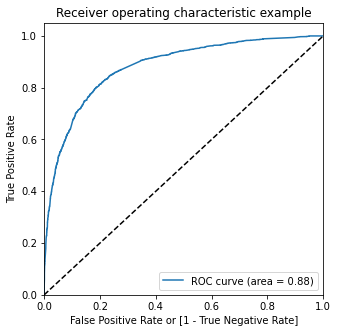

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Because our model's area under the ROC curve is larger (0.89), it is effective.

### Finding Optimal Cutoff Point

The cut-off value of 0.5 was chosen at random above. It is necessary to choose the best cut-off value, and that is addressed in the section that follows. The optimal cutoff probability is the probability at which our sensitivity and specificity are balanced.



In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.847094,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.106762,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.033596,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.943608,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.215353,9170,0,1,1,1,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.583804  0.970236  0.347331
0.2   0.2  0.743095  0.908227  0.642044
0.3   0.3  0.796139  0.842084  0.768024
0.4   0.4  0.811990  0.775527  0.834303
0.5   0.5  0.815286  0.696155  0.888186
0.6   0.6  0.800534  0.591980  0.928156
0.7   0.7  0.786723  0.517983  0.951176
0.8   0.8  0.759730  0.413807  0.971414
0.9   0.9  0.717514  0.274907  0.988363


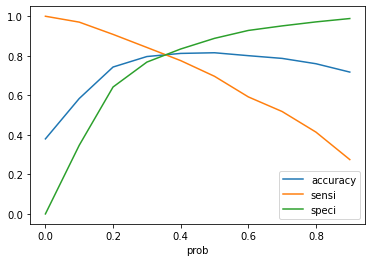

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cutoff probability is 0.34 according to the curve.



In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.847094,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.106762,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.033596,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.943608,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.215353,9170,0,1,1,1,0,0,0,0,0,0,0,0


Assigning Lead Score to the Training data

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.847094,7962,1,1,1,1,1,1,1,1,1,1,0,1,85
1,0,0.106762,5520,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.033596,1962,0,1,0,0,0,0,0,0,0,0,0,0,3
3,1,0.943608,1566,1,1,1,1,1,1,1,1,1,1,1,1,94
4,0,0.215353,9170,0,1,1,1,0,0,0,0,0,0,0,0,22


## Model Evaluation

In [138]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.802887633396108


In [139]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3144,  809],
       [ 447, 1972]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8152128978916908


In [142]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7953453073614976


In [143]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20465469263850242


In [144]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7090974469615247


In [145]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8755221386800334


### Precision and Recall

In [146]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3511,  442],
       [ 735, 1684]], dtype=int64)

In [147]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7920978363123237


In [148]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6961554361306325


In [149]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7920978363123237


In [150]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6961554361306325


In [151]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

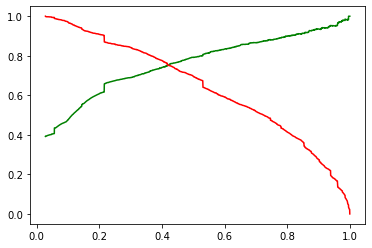

In [153]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

Scaling the test data

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [155]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,-0.103815,1,0,0,1,0,0,0,0,0,0
4050,0,-0.881052,0,1,0,0,0,0,0,0,1,0
7201,1,0.424120,1,0,0,0,0,0,0,0,1,0
1196,0,-0.105648,1,0,0,1,0,0,0,0,0,0
8219,0,-0.428274,1,0,0,0,0,0,0,0,0,0


In [156]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.197048
4050    0.984114
7201    0.345727
1196    0.196735
8219    0.095484
8747    0.215353
9048    0.488564
6524    0.083427
7693    0.147477
8187    0.959678
dtype: float64

In [157]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

,0
3504,0.197048
4050,0.984114
7201,0.345727
1196,0.196735
8219,0.095484


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.197048
1,1,4050,0.984114
2,0,7201,0.345727
3,0,1196,0.196735
4,1,8219,0.095484


In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [165]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [166]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3504,0,0.197048
1,4050,1,0.984114
2,7201,0,0.345727
3,1196,0,0.196735
4,8219,1,0.095484


In [167]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3504,0,0.197048,0
1,4050,1,0.984114,1
2,7201,0,0.345727,1
3,1196,0,0.196735,0
4,8219,1,0.095484,0


In [169]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8136213841083852


In [170]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1359,  330],
       [ 179,  863]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8282149712092131


In [173]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8046181172291297


Assigning Lead Score to the Testing data

In [174]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.197048,0,20
1,4050,1,0.984114,1,98
2,7201,0,0.345727,1,35
3,1196,0,0.196735,0,20
4,8219,1,0.095484,0,10


# Observations:

After running the model on the Test Data , we obtain:

- Accuracy : 80.4 %
- Sensitivity : 80.4 %
- Specificity : 80.5 %

# Results 

1) Comparing the Train & Test values obtained:
Train Information:
- 81.0% accuracy
- Sensitivity: 81.7 percent
- Particularity: 80.6%
Test Information:
- 80.4 percent accuracy
- Intenseness: 80.4%
- 80% precision: 80.5%

Consequently, we have succeeded in achieving our objective of around achieving an 80% lead conversion rate. We should be able to provide the CEO confidence in making wise decisions based on this model in order to achieve a higher lead conversion rate of 80% because it appears to anticipate the conversion rate quite effectively.

2) Identifying the leads who ought to be contacted: The leads who ought to be contacted are the ones whose "Lead Score" is 85 or higher. We can refer to them as "Hot Leads."


In [175]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,4050,1,0.984114,1,98
9,8187,0,0.959678,1,96
23,7005,1,0.995134,1,100
46,5353,1,0.906305,1,91
57,789,1,0.894714,1,89
...,...,...,...,...,...
2717,6163,1,0.907855,1,91
2718,1467,1,0.971936,1,97
2719,4781,1,0.998811,1,100
2729,8043,1,0.962275,1,96


Consequently, 417 leads have a high conversion rate and can be contacted. The following consumers' Prospect IDs need to be contacted:


In [176]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4050, 8187, 7005, 5353,  789, 4844, 7989, 9233, 7725, 8075, 1897,
       1525, 4409, 1883,  802,  737, 5376, 7445, 1612, 6727, 4548, 1157,
       5258, 2852, 8650, 9043, 4173, 3671, 8415, 7320, 7719, 2664,  785,
        446, 3425, 5502, 1490, 8118, 4187, 5815, 7268, 5641, 6170, 8867,
       2571, 9062, 1594, 2489, 8322, 4250, 2460, 8172, 3983, 1737, 4583,
       3407, 6647, 5090, 6314, 1614, 8594, 4359, 7877, 4992, 1979, 8268,
       5868, 8902, 7121, 5791, 1578, 3248, 5535, 5964, 6386, 5137, 4662,
       4048, 7883, 4028, 7469, 6193, 8110, 1957, 2681, 3187, 3839, 5799,
       5975,  373, 4285, 2674, 7089, 6617, 2153, 2022, 3366, 8946, 3725,
       3296, 1722, 5304, 4700, 8787, 1475, 2841,  505, 6306, 1995,  112,
       6127, 2765, 8309, 2860, 8596, 4365, 8897, 2662, 5061, 4149, 6529,
       4607, 6499, 6931, 5167, 4543, 2623, 8687, 6438, 2101, 7326, 4771,
       1481, 4775, 7009, 5026, 2314, 7450, 2475, 2067, 7606, 4212, 2791,
       4297, 2055, 1518, 2598, 7117, 2676, 2042, 30

3) Finding out the Important Features from our final model:

In [177]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               4.013872
What is your current occupation_Working Professional    2.607540
Last Notable Activity_Unreachable                       2.047690
Last Notable Activity_SMS Sent                          1.906964
Last Activity_Others                                    1.855867
Total Time Spent on Website                             1.078158
Lead Source_Olark Chat                                  0.964421
Last Activity_Email Opened                              0.493766
const                                                  -0.844650
Lead Origin_Landing Page Submission                    -0.942038
Specialization_Others                                  -0.956577
Last Activity_Olark Chat Conversation                  -1.034059
Do Not Email                                           -1.215419
dtype: float64

### Suggestions: 

- Lead Origin_Lead Add Form (4.013872): It appears that forecasts are much improved by this feature. It suggests that leads obtained via the lead add form have a higher conversion rate. As a result, the business could wish to put more of an emphasis on and resources into this lead generation channel.


- What is your current occupation_Working Professional (2.607540) This implies that professional leads have a higher conversion rate. To better appeal to this group, the business could modify its course offerings or marketing tactics.


- Last Notable Activity_Unreachable (2.047690): Predictions are significantly improved by leads who were identified as unreachable in their most recent notable activity. The business could find it beneficial to devise plans to reconnect with these prospects or investigate the reason behind their initial unreachability.


- Last Notable Activity_SMS Sent (1.906964): It appears that SMS sending increases conversions. To effectively engage leads, the business might think about adding SMS campaigns to their marketing mix.


- Last Activity_Others (1.855867): This category appears to have a good effect on predictions, but it's difficult to make particular recommendations without knowing exactly what "Others" entails. To find out what activities fit into this category and how they affect conversions, the organization needs look into it more.


- Total Time Spent on Website (1.078158): Predictions benefit from the amount of time spent on the website. It suggests that leads have a higher chance of converting if they spend longer time on the website. The business might concentrate on raising website engagement and giving users useful information.


- Lead Source_Olark Chat (0.964421) is the primary source. Predictions benefit from leads obtained through Olark Chat. To take advantage of this lead source, the business could spend more money on chat-based customer service or sales campaigns.


- Last Activity_Email Opened (0.493766): Email openings have a beneficial effect on forecasts, but not as much as other indicators. However, conversion rates may still rise as a result of email marketing campaign optimization.


- Lead Origin_Landing Page Submission (-0.942038): This indicates that the leads that originate from landing page submissions do not contribute positively to forecasts. To increase conversion rates from this source, the business might need to evaluate the layout of their landing pages or their optimization techniques.


- Specialization_Others (-0.956577): As with "Last Activity_Others," it's difficult to provide particular recommendations in the absence of information about what exactly qualifies as "Others." To fully comprehend this category's effect on conversions, more research is required.


- Last Activity_Olark Chat Conversation (-1.034059): Remarkably, forecasts appear to suffer when the final activity is an Olark Chat discussion. The business might have to reconsider how they manage leads from this channel or evaluate how successful their chat discussions are.

  
- Do Not Email (-1.215419): Predictions suffer from leads who choose not to receive emails. Although it's crucial to honor preferences, the business should nonetheless look into other avenues of contact or devise non-intrusive strategies to encourage email subscriptions.
